In [2]:
from xgboost import XGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #교차검증
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)

import pandas as pd
import numpy as np

In [3]:
boston = load_boston()
x,y = boston.data, boston.target
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.15)
print("boston:",boston.data.shape) 
print("xtrain:",xtrain.data.shape) # 학습에 투입시킬 데이터 (행,열)
print("ytrain:",ytrain.data.shape) # 학습에 투입시킬 데이터 (행)
print("xtest:",xtest.data.shape) # 테스트용 데이터 (행,열)
print("ytest:",ytest.data.shape) # 테스트용 데이터 (행)

boston: (506, 13)
xtrain: (430, 13)
ytrain: (430,)
xtest: (76, 13)
ytest: (76,)


In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

# xgb 회귀 클래스를 사용하여 모델을 정의
## *verbosity : 상세정보

In [5]:
xgbr = XGBRegressor(verbosity=0) # verbosity : 상세한 로깅logging 을 출력 할지 말지를 조정하는 parameter
print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


# 훈련데이터에 대한 모델 적합

In [6]:
xgbr.fit(xtrain,ytrain)
score= xgbr.score(xtrain,ytrain)
print("Training score: ",score)

Training score:  0.9999915071416037


# 평균 훈련점수를 식별하기 위해 '교차검증'
## 교차검증평균값으로 모델의 정확도를 기대할 수 있음
### CV=10 : 10겹 교차검증


#### 교차 검증의 장점은 train_test_split와 비교해보면

train_test_split는 데이터를 무작위로 나눔. 데이터를 무작위로 나눌 때

훈련 세트 ==>  분류하기 어려운 샘플

테스트세트 ==> 분류하기 쉬운 샘플

테스트 세트의 정확도는 비현실적으로 높게 나올 것입니다. 

반대의 경우라면 테스트 세트의 정확도는 비현실적으로 낮게 나옴



그러나 교차 검증을 사용하면 테스트 세트에 각 샘플이 정확하게 한번씩 들어가고

각 샘플은 폴드 중 하나에 속하며 각 폴드는 한번씩 테스트 세트가 됨 

그렇기 때문에 교차 검증의 점수를 높이기 위해서는 데이터 셋에 있는 모든 샘플에 대해 모델이 잘 일반화 되어야 함



데이터를 여러개로 나누면 모델이 훈련 데이터에 얼마나 민감한지 알 수가 있음 

iris데이터셋에서 90%~ 100%의 정확도를 얻음. 최악의 경우와 최선의 경우를 짐작할 수 있음



교차 검증의 주요 단점은 연산 비용이 늘어남

모델을 k개 만들어야 하므로 데이터를 한 번 나눴을때보다 대략 k배 더 느림

In [7]:
cv_score = cross_val_score(xgbr,xtrain,ytrain,cv=10) #croos_val_score(모델명, 훈련데이터타깃, CV)
print("CV mean score:",cv_score.mean())

CV mean score: 0.8738301101123647


# 이제 예측 후 훈련 모델을 사용하여 테스트 데이터 예측
# 정확도 비율을 확인할 수 있다.

# 손실함수(Loss function) : MSE, RMSE

In [8]:
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest,ypred)
print("MSE:",mse) # MSE: 추측값에 대한 정확도 측정, 정답에 가까울수록 작은 값 출력
print("RMSE:",mse*(1/2.0))# RMSE : 추정 값 또는 모델이 예측한 값과 실제 환경에서 관찰되는 값의 차이를 다룰 때 흔히 사용하는 측도이다.

MSE: 12.664577111115873
RMSE: 6.332288555557937


# 이제 비율을 얻었다.
# 이제 결과를 확인하기 위해 마지막으로 테스트데이터 및 예측데이터를 시각화한다.


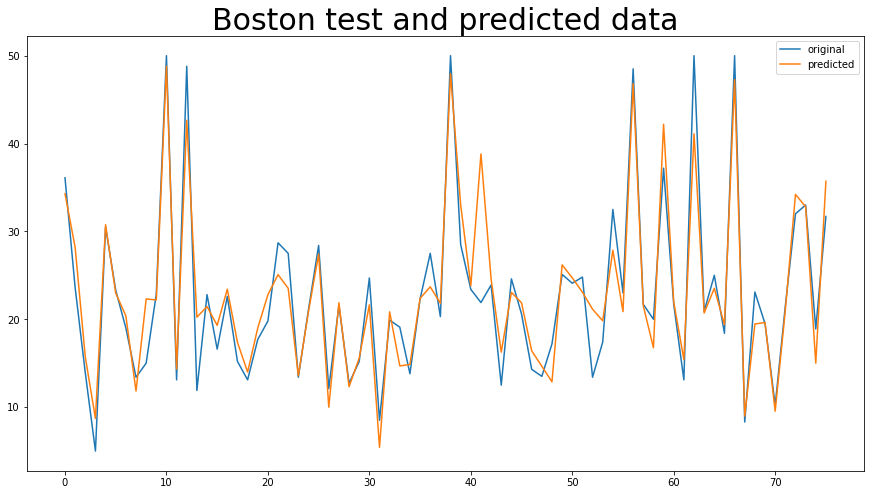

In [9]:
x_ax= range(len(ytest))
plt.plot(x_ax,ytest,label="original")
plt.plot(x_ax,ypred, label ="predicted")
plt.title("Boston test and predicted data",fontsize=30)
plt.legend()
plt.show()

In [10]:
ytest

array([36.1, 23.6, 13.9,  5. , 30.5, 23.3, 19. , 13.4, 15. , 22.9, 50. ,
       13.1, 48.8, 11.9, 22.8, 16.6, 22.6, 15.2, 13.1, 17.7, 19.8, 28.7,
       27.5, 13.4, 21.1, 28.4, 12.1, 21.6, 12.7, 15.2, 24.7,  8.5, 19.9,
       19.1, 13.8, 22.3, 27.5, 20.3, 50. , 28.5, 23.4, 21.9, 23.9, 12.5,
       24.6, 20.6, 14.3, 13.5, 17.2, 25.1, 24.1, 24.8, 13.4, 17.4, 32.5,
       23. , 48.5, 21.7, 20. , 37.2, 21.7, 13.1, 50. , 20.9, 25. , 18.4,
       50. ,  8.3, 23.1, 19.5, 10.2, 21.5, 32. , 33. , 18.9, 31.7])